In [22]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

torch.__version__


'2.8.0+cu126'

##Creating *known* parameters


In [23]:

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [24]:
len(X), len(y)

(50, 50)

##Splitting data into training and testing sets


In [25]:

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [26]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [27]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label = "Training Data")

  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

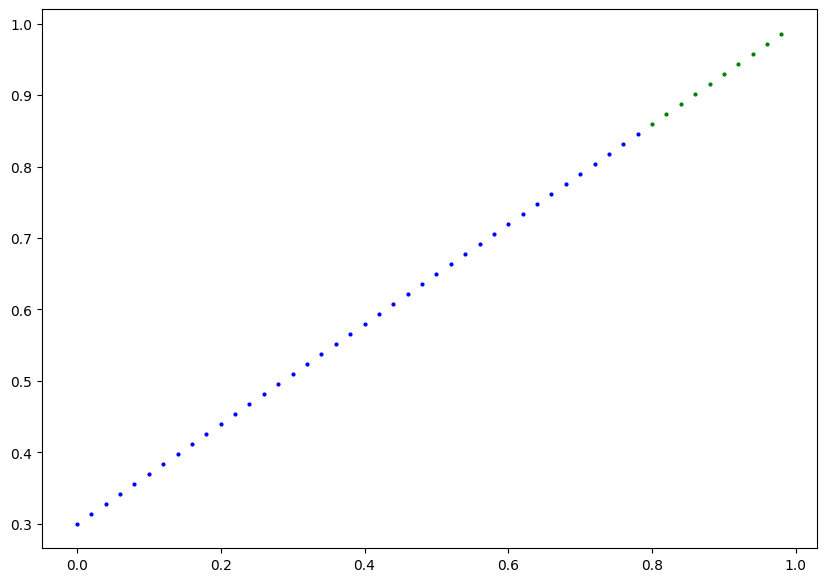

In [28]:
plot_predictions();

##2 . Building model

In [48]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

In [47]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super.__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype= torch.float))

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias


##Pytorch model building essentials

* torch.nn - contains all of the builfings for computational graphs(a neural network can be considered a computational graph)

* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us

* torch.optim - this where the optimizers in Pytorch live, they will help with gradient descent

* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation


 ## Checking the contents of our PyTorch model:


In [46]:
#Create a random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

TypeError: descriptor '__init__' of 'super' object needs an argument

In [45]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

TypeError: descriptor '__init__' of 'super' object needs an argument

In [32]:
# List named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [33]:
weight, bias

(0.7, 0.3)

### Making predictions using 'torch.inference_mode()'

To check our model's predictive power, let's see how well it predicts 'y_test' based on 'X_test'.

When we pass data through our model, it's going to run it through the 'forward()' method


In [34]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [35]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

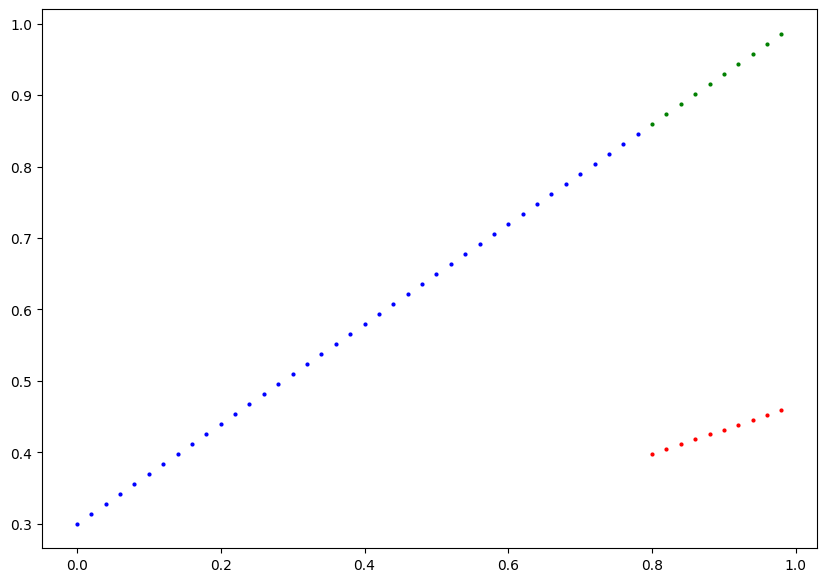

In [36]:
plot_predictions(predictions = y_preds)

In [37]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [38]:
    model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [39]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01) # learning rate



### Building a training loop (and a testing loop) in Pytorch

1. A couple of things we need in a training loop:
2. Forward pass (this involves data moving through our model's 'forward()' functions) to make predictions on data - also called forward propagation.
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss.(**Backpropogation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss

In [40]:
# An epoch is one loop through the data....
epochs = 1

for epoch in range(epochs):
  model_0.train()
  #Foward pass
  y_pred = model_0(X_train)
  #Calculate the loss
  loss = loss_fn(y_pred, y_train)
  #Optimiser zero grad
  optimizer.zero_grad()
  # Perform backpropagation on the loss with respect to the parameters of the model.
  loss.backward()
  # Step the optimizer(perform gradient descent)
  optimizer.step()

  model_0.eval()#turns off gradient tracking


In [41]:
torch.manual_seed(42)

epochs = 200

epoch_values= []
loss_values = []
test_loss_values = []
for epoch in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)
  print(f"Loss:{loss}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch%10==0:
    epoch_values.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch}|Loss:{loss}|Test Loss : {test_loss}")

    print(model_0.state_dict())

Loss:0.3013603389263153
Epoch:0|Loss:0.3013603389263153|Test Loss : 0.4675942063331604
OrderedDict({'weights': tensor([0.3445]), 'bias': tensor([0.1488])})
Loss:0.28983935713768005
Loss:0.2783183455467224
Loss:0.26679736375808716
Loss:0.2552763521671295
Loss:0.24375534057617188
Loss:0.23223432898521423
Loss:0.22071333229541779
Loss:0.20919232070446014
Loss:0.1976713240146637
Loss:0.18615034222602844
Epoch:10|Loss:0.18615034222602844|Test Loss : 0.3328842222690582
OrderedDict({'weights': tensor([0.3835]), 'bias': tensor([0.2488])})
Loss:0.1746293306350708
Loss:0.16310831904411316
Loss:0.1515873372554779
Loss:0.14006635546684265
Loss:0.1285453587770462
Loss:0.11702437698841095
Loss:0.1060912236571312
Loss:0.09681284427642822
Loss:0.08908725529909134
Loss:0.08227583020925522
Epoch:20|Loss:0.08227583020925522|Test Loss : 0.2069590985774994
OrderedDict({'weights': tensor([0.4222]), 'bias': tensor([0.3403])})
Loss:0.07638873159885406
Loss:0.07160007208585739
Loss:0.06747635453939438
Loss:0.0

In [42]:
np.random.seed(42)

epochs = 100
epoch_values = []
loss_values = []
test_loss_values=[]

for epoch in range(epochs):

  model_0.train()

  y_pred = model_0(X_train)

  loss_fn(y_pred, y_test)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)


  if epoch%10==0:
    epoch_values.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch}| Loss:{loss}| Test Loss : {test_loss}")





/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:129: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([40, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (40) must match the size of tensor b (10) at non-singleton dimension 0

####Learning rate Scheduling

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
weight, bias

In [ ]:
plot_predictions(predictions = y_preds_new)